In [ ]:
#This program attempts to optimize user's portfolio using the Effecient Frontier

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
#stock symbol/tickers in portfolio
#FAANG
assets = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

#Assign weihts to the stock
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

#Set the portfolio start date
portfolio_start_date = "2013-01-01"

#Set the portfolio ending date
portfolio_end_date = "2023-01-01"

In [ ]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stocks in the dataframe
for stock in assets:
  df[stock] = yf.download(stock, start = portfolio_start_date, end = portfolio_end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,12.865500,16.791191,13.144286,18.013729
2013-01-03,27.770000,12.924000,16.579247,13.798571,18.024191
2013-01-04,28.760000,12.957500,16.117426,13.711429,18.380356
2013-01-07,29.420000,13.423000,16.022627,14.171429,18.300158
2013-01-08,29.059999,13.319000,16.065752,13.880000,18.264042
...,...,...,...,...,...
2022-12-23,118.040001,85.250000,131.299820,294.959991,89.809998
2022-12-27,116.879997,83.040001,129.477600,284.170013,87.930000
2022-12-28,115.620003,81.820000,125.504539,276.880005,86.459999


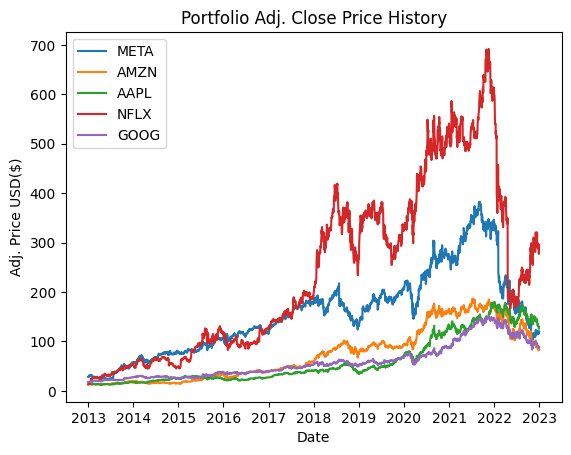

In [ ]:
#Visualizing the portfolio

my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label=c)

plt.title('Portfolio Adj. Close Price History')
plt.xlabel('Date')
plt.ylabel('Adj. Price USD($)')
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [ ]:
#Calculate the daily simple returns
returns = df.pct_change()
returns

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2022-12-23,0.007855,0.017425,-0.002798,-0.009370,0.017562
2022-12-27,-0.009827,-0.025924,-0.013878,-0.036581,-0.020933
2022-12-28,-0.010780,-0.014692,-0.030685,-0.025654,-0.016718


In [ ]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,META,AMZN,AAPL,NFLX,GOOG
META,0.145232,0.067481,0.053286,0.075060,0.061476
AMZN,0.067481,0.106347,0.048006,0.074730,0.055710
AAPL,0.053286,0.048006,0.084464,0.043826,0.045086
NFLX,0.075060,0.074730,0.043826,0.228087,0.056313
GOOG,0.061476,0.055710,0.045086,0.056313,0.073510


In [ ]:
#Calculate the portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
portfolio_variance

0.07198346936481234

In [ ]:
#Calculate the portfolio volatility/standard deviation
portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

0.26829735251174647

In [ ]:
#Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean() * weights) * 252
portfolio_simple_annual_return

0.26562234033658316

In [ ]:
#Show the expected annual return, volatility/risk and variance

percent_variance = str(round(portfolio_variance * 100,2)) + '%'
percent_volatility = str(round(portfolio_volatility * 100,2)) + '%'
percent_returns = str(round(portfolio_simple_annual_return * 100,2)) + '%'

print('Expected annual returns : '+ percent_returns)
print('Annual Volatility (risk) : '+ percent_volatility)
print('Annual variance : '+ percent_variance)

Expected annual returns : 26.56%
Annual Volatility (risk) : 26.83%
Annual variance : 7.2%


In [ ]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
#Portfolio Optimization

#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize the Max Sharpe Ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('META', 0.0), ('AMZN', 0.05298), ('AAPL', 0.57598), ('NFLX', 0.36418), ('GOOG', 0.00687)])
Expected annual return: 27.6%
Annual volatility: 28.9%
Sharpe Ratio: 0.89


(0.2758457517705592, 0.2888787307301556, 0.885651051996442)

In [ ]:
ef_min_volatility = EfficientFrontier(mu,S)
weights_min_volatility = ef_min_volatility.min_volatility()
cleaned_weights = ef_min_volatility.clean_weights()
print(cleaned_weights)
ef_min_volatility.portfolio_performance(verbose = True)

OrderedDict([('META', 0.00442), ('AMZN', 0.12809), ('AAPL', 0.37066), ('NFLX', 0.03447), ('GOOG', 0.46236)])
Expected annual return: 20.4%
Annual volatility: 24.5%
Sharpe Ratio: 0.75


(0.20386273036724034, 0.24504725337193142, 0.750315409935138)